# Day_1

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import pickle as pk

In [10]:
pd.read_csv("Cars.csv")

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [12]:
cars_df=pd.read_csv("Cars.csv")

In [14]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [16]:
cars_df.shape

(81, 5)

In [18]:
cars_df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [20]:
cars_df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [34]:
cars_df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


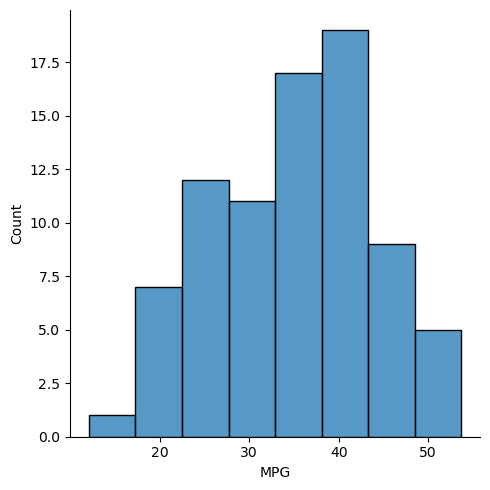

In [42]:
sns.displot(cars_df["MPG"]) #HISTOGRAM

C:\Users\chandrumd\AppData\Local\Temp\ipykernel_7036\1451873260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["MPG"]) #Histrogram


<Axes: xlabel='MPG', ylabel='Density'>

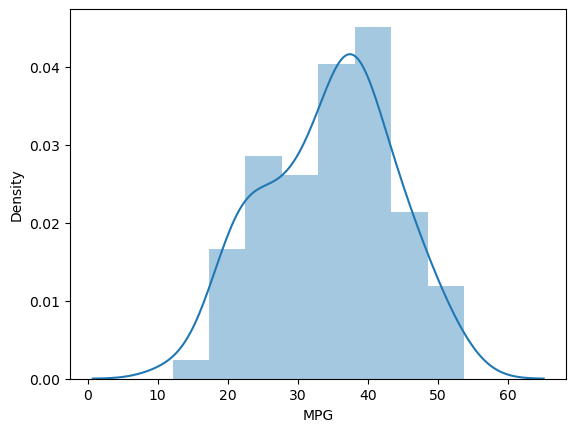

In [44]:
sns.distplot(cars_df["MPG"]) #Histrogram

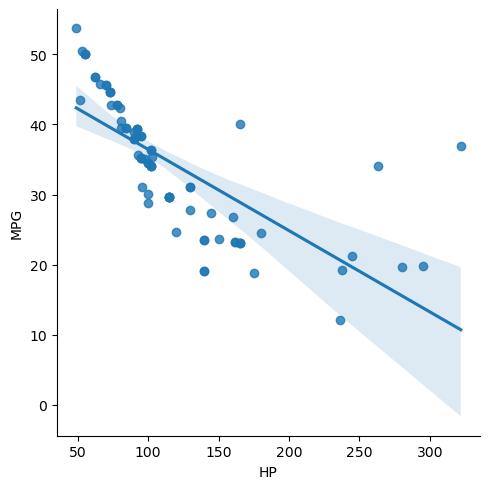

In [46]:
sns.lmplot(data=cars_df,x="HP",y="MPG")

In [48]:
for i in cars_df:
    print(i)

HP
MPG
VOL
SP
WT


## ASSUMPTION 1 LINEARITY TEST

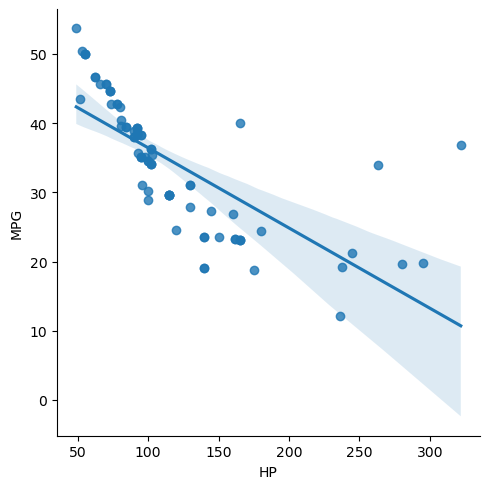

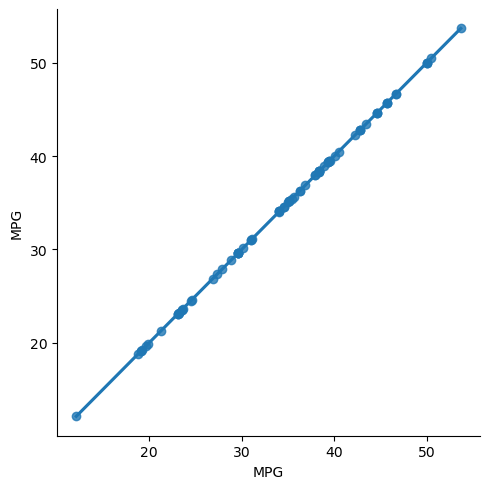

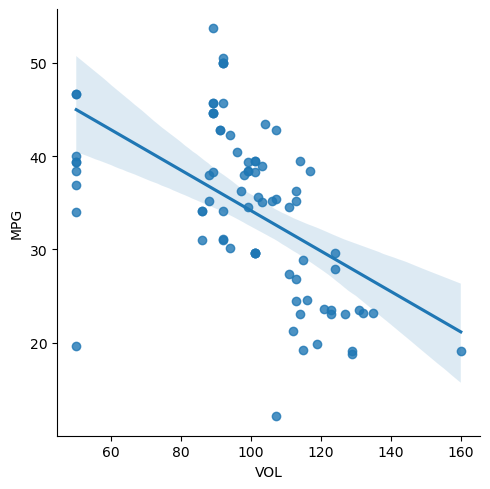

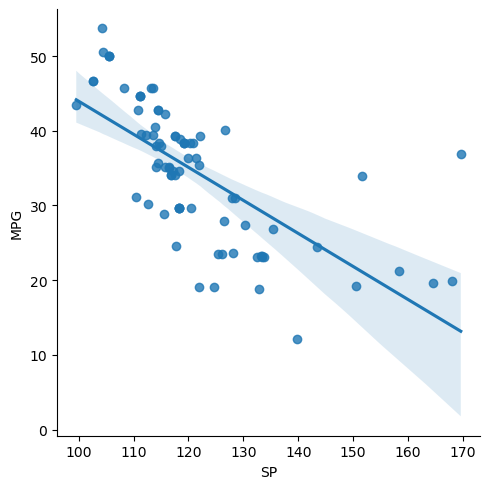

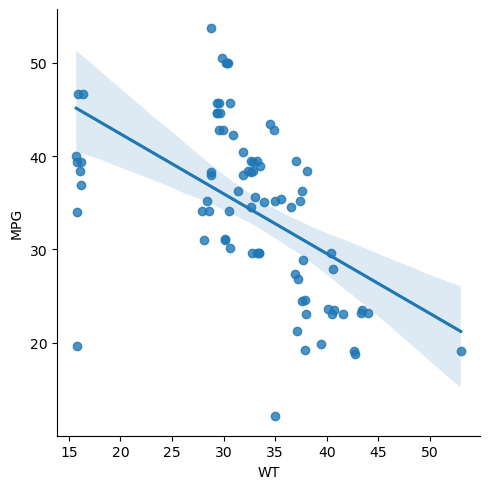

In [50]:
for i in cars_df:
    sns.lmplot(data=cars_df,x=i,y="MPG")

## lINEARITY TEST FAILED

## ASSUMPTION 2 MULTI CO LINEARITY

In [56]:
cars_df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


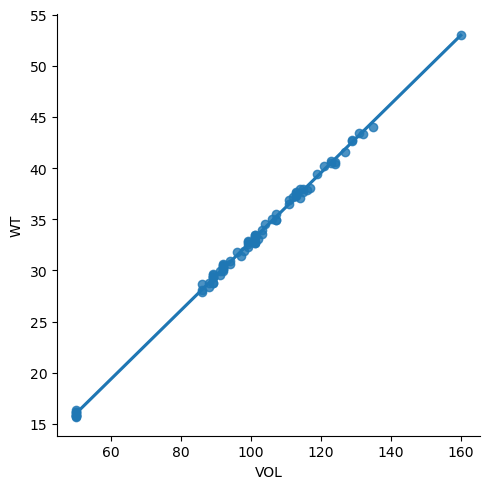

In [60]:
sns.lmplot(data=cars_df,x="VOL",y="WT") #Strong CO-Relation happens

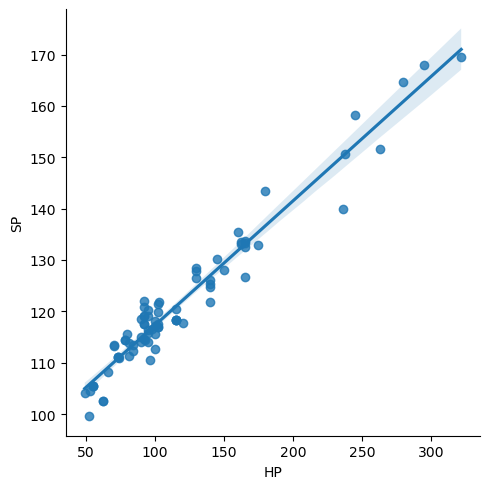

In [62]:
sns.lmplot(data=cars_df,x="HP",y="SP")

<Axes: >

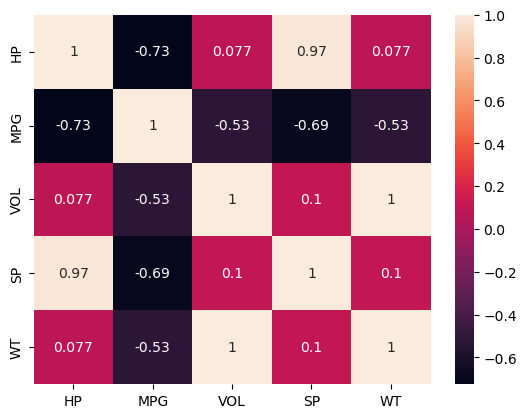

In [64]:
sns.heatmap(cars_df.corr(),annot=True)

## MULTI CO LINEARITY FAILED

## ASSUMPTION 3 AUTO REGRESSION

In [68]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### In this data, NO Auto Regression: AUTO REGRESSION PASSED

In [71]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [77]:
x=cars_df.drop(labels="MPG",axis=1)

In [75]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [79]:
y=cars_df[["MPG"]]

In [81]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [83]:
model=LinearRegression()

In [85]:
model.fit(x,y)

LinearRegression()

In [87]:
model.predict(x)

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [95]:
y_pred=model.predict(x)

In [91]:
model.intercept_

array([30.67733585])

In [93]:
model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [97]:
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [103]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.2679682854207996

In [105]:
r2_score(cars_df["MPG"],y_pred)

0.7705372737359842

# ASSUMPTION 4 HOMOSCADASTICITY

In [126]:
#It states that Constant variance in our error

In [107]:
error=y-y_pred

In [109]:
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


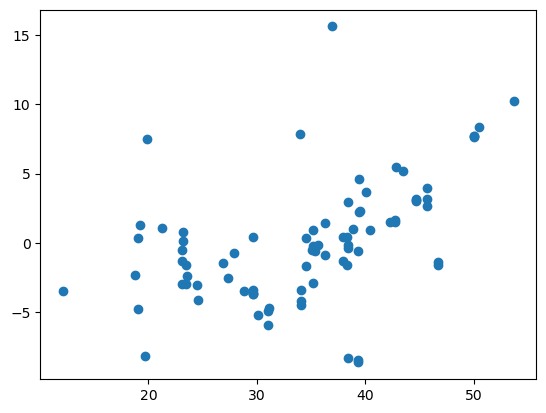

In [123]:
plt.scatter(x=cars_df["MPG"],y=error)

## FAILED

# ASSUMPTION 5 ZERO RESIDUAL MEAN

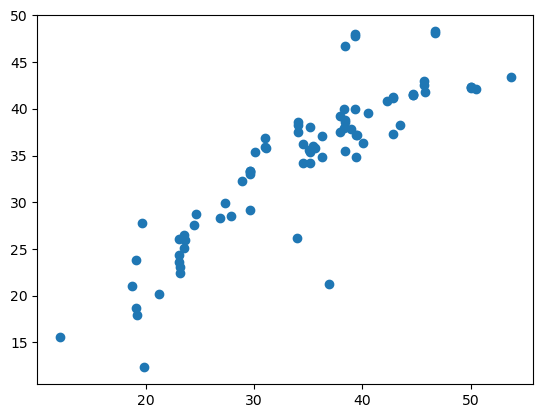

In [114]:
plt.scatter(x=y,y=y_pred)

## FAILED

# STATSMODELS

In [137]:
model_1=smf.ols(formula="MPG~HP+VOL+SP+WT",data=cars_df).fit()

In [139]:
model_1

In [141]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [143]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [145]:
model.intercept_

array([30.67733585])

In [147]:
model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [149]:
model_1.aic

477.92790493548785

In [153]:
model_1.bic

489.90015070885005

In [159]:
model_1.rsquared # r^2=1-(RSS/TSS)

0.7705372737359845

In [157]:
model_1.rsquared_adj

0.7584602881431416

In [161]:
model_1=smf.ols(formula="MPG~HP+VOL+SP+WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 477.92790493548785
BIC= 489.90015070885005
rsquared= 0.7705372737359845
rsquared_adj= 0.7584602881431416


In [163]:
model_1=smf.ols(formula="MPG~HP",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 530.7452702659343
BIC= 535.5341685752792
rsquared= 0.5256806086282022
rsquared_adj= 0.5196765656994453


In [165]:
model_1=smf.ols(formula="MPG~VOL",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 564.5634161305575
BIC= 569.3523144399023
rsquared= 0.27990086511227075
rsquared_adj= 0.27078568618964116


In [167]:
model_1=smf.ols(formula="MPG~SP",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 539.408199092848
BIC= 544.1970974021929
rsquared= 0.4721402334141218
rsquared_adj= 0.46545846421683224


In [169]:
model_1=smf.ols(formula="MPG~WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 564.8358142145094
BIC= 569.6247125238542
rsquared= 0.2774751389270127
rsquared_adj= 0.2683292546096331


<Axes: >

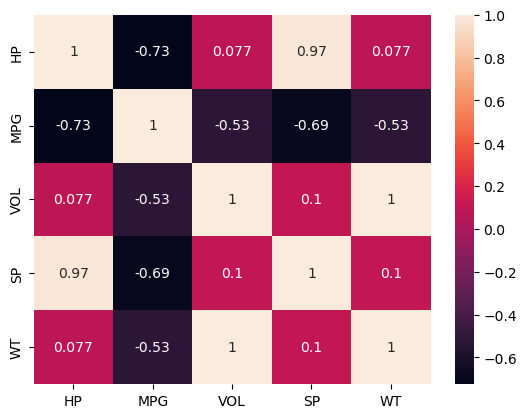

In [171]:
sns.heatmap(cars_df.corr(),annot=True)

In [183]:
model_1=smf.ols(formula="MPG~HP+SP",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj) #Highly co-realted each other

AIC= 531.5481466080848
BIC= 538.7314940721021
rsquared= 0.5326391712851648
rsquared_adj= 0.5206555602924767


In [191]:
model_1=smf.ols(formula="MPG~HP+SP+WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 476.2992750152976
BIC= 485.8770716339874
rsquared= 0.769482813998346
rsquared_adj= 0.7605016249333465


In [258]:
model_1=smf.ols(formula="MPG~HP+SP+WT+VOL",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 477.92790493548796
BIC= 489.90015070885016
rsquared= 0.7705372737359842
rsquared_adj= 0.7584602881431413


In [193]:
model_1=smf.ols(formula="MPG~SP+WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 500.2002027768268
BIC= 507.3835502408441
rsquared= 0.6826231212746163
rsquared_adj= 0.6744852525893501


In [195]:
model_1=smf.ols(formula="MPG~WT+VOL",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 566.3145901819738
BIC= 573.4979376459911
rsquared= 0.2821095616445979
rsquared_adj= 0.26370211450728


In [201]:
model_F1=smf.ols(formula="MPG~HP+SP+WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 476.2992750152976
BIC= 485.8770716339874
rsquared= 0.769482813998346
rsquared_adj= 0.7605016249333465


In [237]:
# 0.769482813998346

# DATA TRANSFORMATION TECHNIQUES
## IF THE DATA IS CONTINIOUS;
LOG TRANSFORMATION

SQAURE TRANSFORMATION

CUBE TRANSFORMATION

RECIPORCAL TRANSFORMATION

BOXCOX TRANSFORMATION

STANDARD SCALER

MIN MAX SCALER

ROBUST SCALAR

## IF THE DATA IS DISCRETE;

LABEL ENCODING

ONE HOT ENCODING

In [205]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [207]:
cars_df1=cars_df.copy()

In [209]:
cars_df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [211]:
cars_df1["log_HP"]=np.log(cars_df["HP"])

In [213]:
cars_df1["log_VOL"]=np.log(cars_df["VOL"])
cars_df1["log_SP"]=np.log(cars_df["SP"])
cars_df1["log_WT"]=np.log(cars_df["WT"])

In [215]:
cars_df1

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


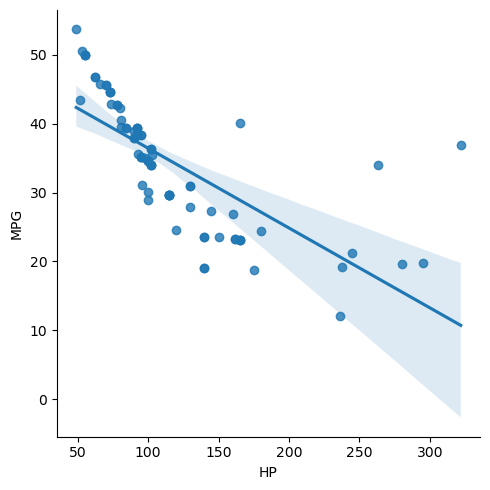

In [223]:
sns.lmplot(data=cars_df,x="HP",y="MPG") #BEFORE APPLYING LOG

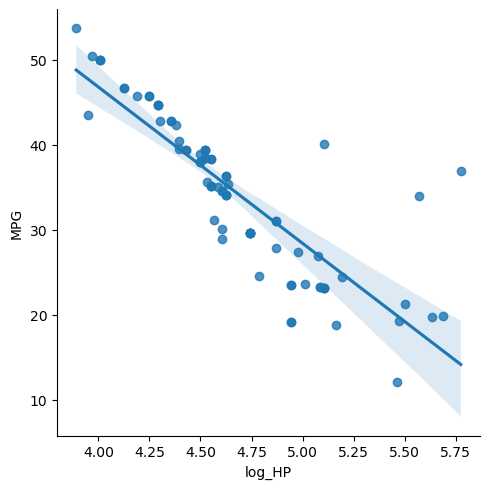

In [225]:
sns.lmplot(data=cars_df1,x="log_HP",y="MPG") #AFTER APPLYING LOG

<Axes: >

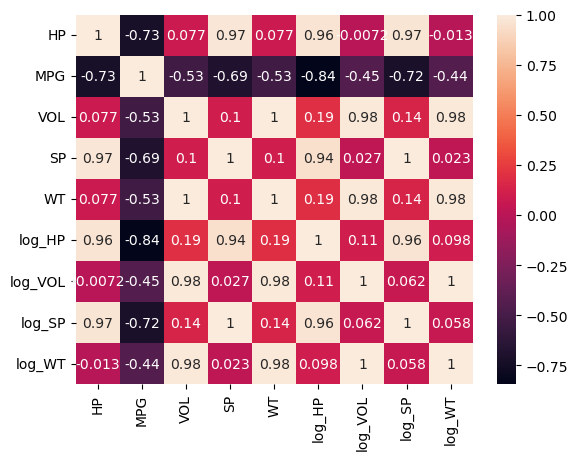

In [229]:
sns.heatmap(cars_df1.corr(),annot=True)

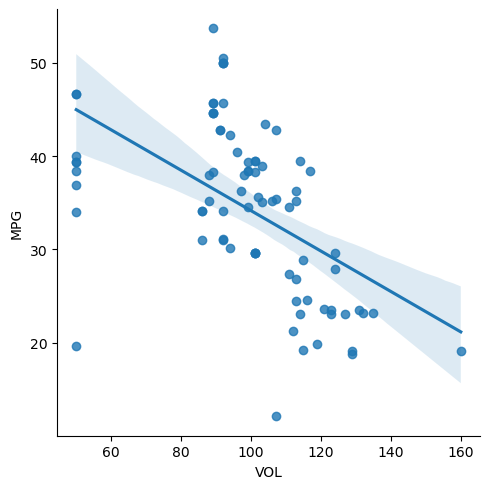

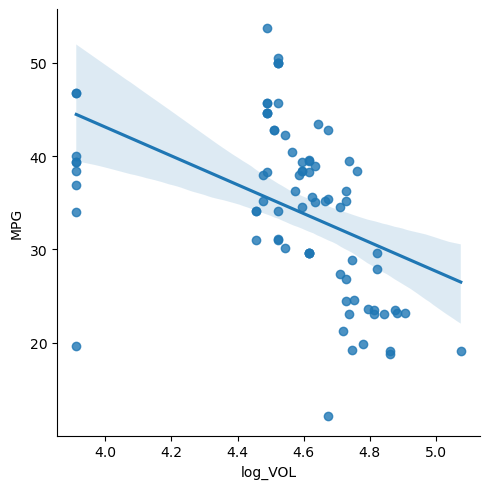

<Axes: >

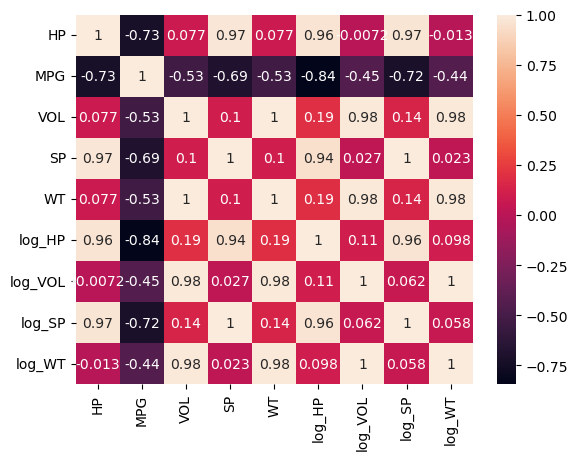

In [231]:
sns.lmplot(data=cars_df,x="VOL",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_VOL",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

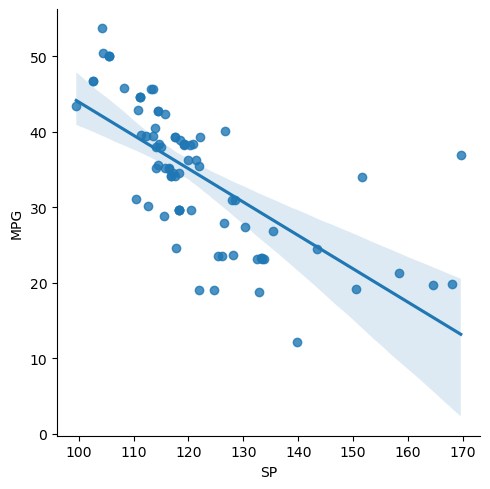

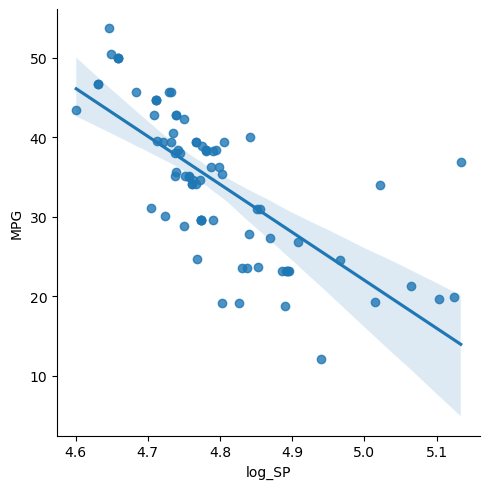

<Axes: >

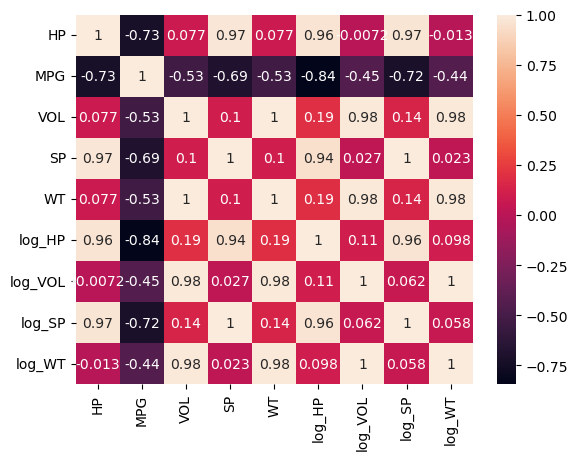

In [233]:
sns.lmplot(data=cars_df,x="SP",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_SP",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

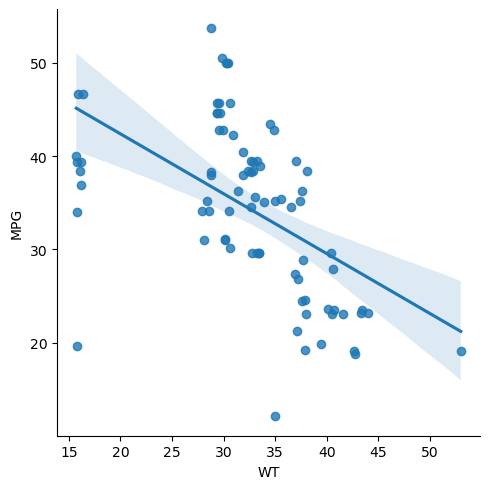

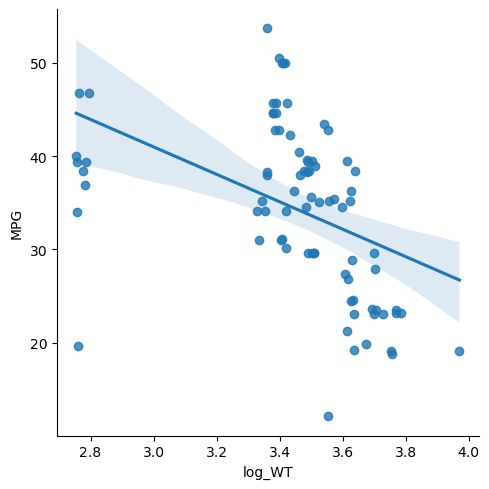

<Axes: >

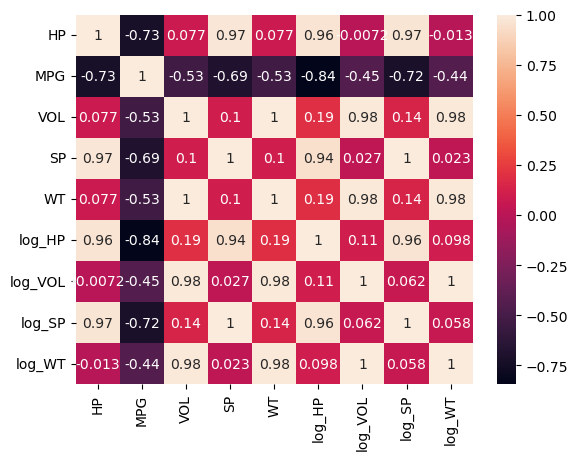

In [235]:
sns.lmplot(data=cars_df,x="WT",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_WT",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

# DAY_3

In [239]:
cars_df1

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


In [268]:
model_1=smf.ols(formula="MPG~HP+VOL+SP+WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 477.92790493548785
BIC= 489.90015070885005
rsquared= 0.7705372737359845
rsquared_adj= 0.7584602881431416


In [270]:
model_2=smf.ols(formula="MPG~log_HP+log_VOL+log_SP+log_WT",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 400.50133505038724
BIC= 412.47358082374944
rsquared= 0.9117779418023275
rsquared_adj= 0.9071346755813974


In [260]:
model_1=smf.ols(formula="MPG~HP",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 530.7452702659343
BIC= 535.5341685752792
rsquared= 0.5256806086282022
rsquared_adj= 0.5196765656994453


In [247]:
model_2=smf.ols(formula="MPG~log_HP",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 490.49860857307215
BIC= 495.287506882417
rsquared= 0.7114095515436409
rsquared_adj= 0.7077565078922946


In [262]:
model_1=smf.ols(formula="MPG~VOL",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 564.5634161305575
BIC= 569.3523144399023
rsquared= 0.27990086511227075
rsquared_adj= 0.27078568618964116


In [249]:
model_2=smf.ols(formula="MPG~log_VOL",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 573.0814921857461
BIC= 577.870390495091
rsquared= 0.2000491225011476
rsquared_adj= 0.18992316202647852


In [264]:
model_1=smf.ols(formula="MPG~SP",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 539.408199092848
BIC= 544.1970974021929
rsquared= 0.4721402334141218
rsquared_adj= 0.46545846421683224


In [251]:
model_2=smf.ols(formula="MPG~log_SP",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 532.1442469181513
BIC= 536.9331452274962
rsquared= 0.5174173348052119
rsquared_adj= 0.5113086934736323


In [266]:
model_1=smf.ols(formula="MPG~WT",data=cars_df).fit()
print("AIC=",model_1.aic)
print("BIC=",model_1.bic)
print("rsquared=",model_1.rsquared)
print("rsquared_adj=",model_1.rsquared_adj)

AIC= 564.8358142145094
BIC= 569.6247125238542
rsquared= 0.2774751389270127
rsquared_adj= 0.2683292546096331


In [253]:
model_2=smf.ols(formula="MPG~log_WT",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 573.689208547852
BIC= 578.4781068571968
rsquared= 0.1940247830818731
rsquared_adj= 0.18382256514620054


<Axes: >

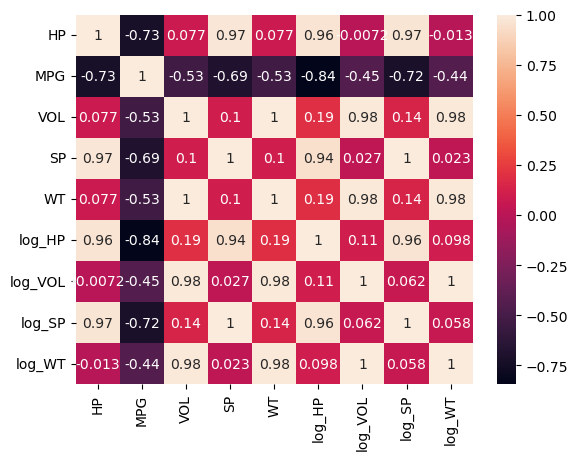

In [255]:
sns.heatmap(cars_df1.corr(),annot=True)

In [272]:
model_2=smf.ols(formula="MPG~log_HP+log_VOL+log_SP",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 399.1034940191332
BIC= 408.681290637823
rsquared= 0.9111196497498922
rsquared_adj= 0.907656778960927


In [274]:
model_F2=smf.ols(formula="MPG~log_HP+log_VOL+log_SP",data=cars_df1).fit()
print("AIC=",model_2.aic)
print("BIC=",model_2.bic)
print("rsquared=",model_2.rsquared)
print("rsquared_adj=",model_2.rsquared_adj)

AIC= 399.1034940191332
BIC= 408.681290637823
rsquared= 0.9111196497498922
rsquared_adj= 0.907656778960927


In [278]:
y_stats_pred=model_2.predict()

In [280]:
y_stats_pred

array([52.67641775, 48.96462854, 48.96462854, 45.728028  , 49.59501341,
       45.9111458 , 48.96462854, 49.23344525, 49.23344525, 42.01757229,
       42.95749793, 45.25119353, 40.49519274, 42.95749793, 44.56156583,
       42.95749793, 42.4554456 , 45.25119353, 42.4554456 , 38.50242421,
       38.54880288, 40.1334771 , 37.90545168, 40.08041245, 38.60971176,
       43.2292433 , 37.74616954, 38.54880288, 45.16459155, 35.2549007 ,
       36.55567194, 37.09149106, 35.48043868, 34.71406543, 37.74238617,
       36.74417959, 37.32896701, 34.84681863, 34.84681863, 32.44991247,
       34.06380485, 34.35051187, 34.45521459, 35.32071372, 34.64417142,
       34.12668307, 33.57124469, 34.00719963, 32.87313445, 29.49709305,
       29.49709305, 29.49709305, 28.57180341, 26.64912669, 26.53221009,
       27.82293804, 31.89942522, 29.49709305, 31.6726542 , 31.41034114,
       27.3351991 , 25.9442572 , 24.23060207, 24.48268797, 23.84365894,
       29.32354458, 23.59106791, 23.07700213, 23.22204768, 23.03

In [282]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.2679682854207996

In [286]:
mean_absolute_error(cars_df["MPG"],y_stats_pred)

1.5853611936083458

In [291]:
# 0.9111196497498922

In [293]:
# Removing Outliers or influential observations

In [295]:
model_Outliers=model_F2.get_influence()

In [301]:
dis,_=model_Outliers.cooks_distance

In [303]:
dis

array([3.40987125e-03, 2.23408703e-03, 2.23408703e-03, 1.77985502e-06,
       1.79486181e-03, 7.64695598e-05, 2.23408703e-03, 3.19265706e-02,
       3.19265706e-02, 7.99487571e-05, 2.44665515e-03, 1.19735589e-01,
       2.13272656e-03, 2.44665515e-03, 1.44838258e-03, 2.44665515e-03,
       1.03203952e-04, 1.19735589e-01, 1.03203952e-04, 1.30253749e-04,
       1.41649274e-05, 6.51265138e-03, 1.29286512e-04, 1.01394529e-04,
       5.14819946e-05, 8.93020535e-02, 6.85709760e-04, 1.41649274e-05,
       5.66794132e-03, 1.50386508e-05, 6.49382140e-03, 3.54581546e-03,
       2.77708017e-04, 1.90090447e-03, 2.22732873e-03, 7.44988994e-04,
       2.47403353e-04, 4.32180481e-04, 4.32180481e-04, 1.21316892e-03,
       7.63813854e-04, 3.72410329e-04, 8.16200351e-05, 2.44091959e-05,
       6.47854742e-04, 9.73561619e-05, 5.57764358e-04, 5.99712527e-04,
       2.12897923e-03, 1.98013115e-05, 1.98013115e-05, 1.98013115e-05,
       1.08708219e-03, 1.03438056e-02, 1.08946217e-04, 9.85957728e-07,
      

<Figure size 1500x800 with 0 Axes>

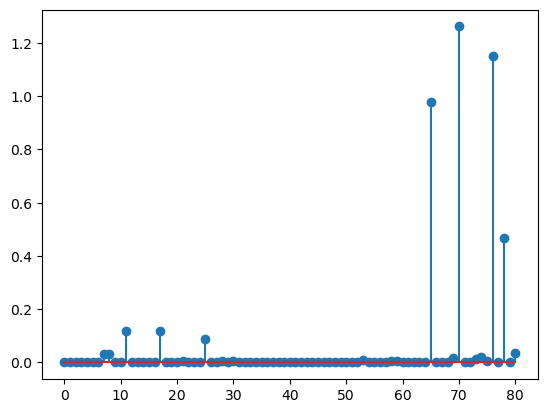

<Figure size 1500x800 with 0 Axes>

In [313]:
plt.stem(dis)
plt.figure(figsize=(15,8))

In [315]:
# 4 Outliers

In [317]:
cars_df1['dis']=dis

In [319]:
cars_df1.sort_values(by="dis",ascending=False)

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,dis
70,280,19.678507,50,164.598513,15.823060,5.634790,3.912023,5.103509,2.761468,1.262088e+00
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.152413e+00
65,165,40.050000,50,126.598513,15.712859,5.105945,3.912023,4.841021,2.754479,9.788351e-01
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,4.676712e-01
11,92,39.354094,50,117.598513,15.753535,4.521789,3.912023,4.767276,2.757065,1.197356e-01
...,...,...,...,...,...,...,...,...,...,...
27,92,38.411003,99,119.105055,32.835069,4.521789,4.595120,4.780006,3.491497,1.416493e-05
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,1.779855e-06
55,130,27.856252,124,126.404312,40.589068,4.867534,4.820282,4.839486,3.703499,9.859577e-07
67,165,23.103172,127,133.680223,41.573975,5.105945,4.844187,4.895451,3.727474,8.988543e-07


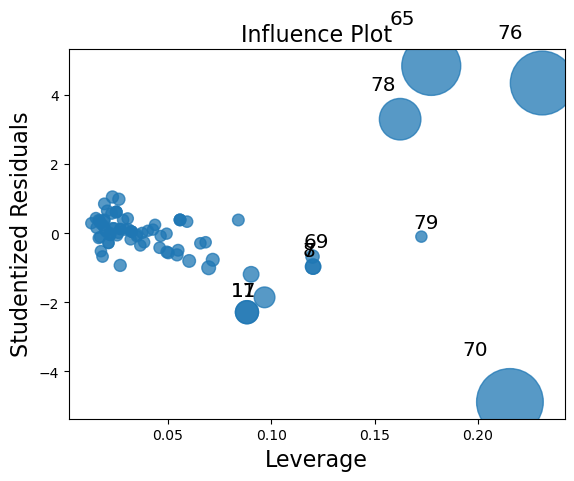

In [323]:
influence_plot(model_F2)
plt.show()

In [329]:
Nods=cars_df1.drop(labels=[70,76,65,78])

In [331]:
Nods

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.003410
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002234
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002234
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000002
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.001795
...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,4.859812,4.802907,3.752293,0.018712
75,175,18.762837,129,132.864163,42.778219,5.164786,4.859812,4.889327,3.756029,0.003851
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.001262
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000507


In [335]:
model_F2=smf.ols(formula="MPG~log_HP+log_VOL+log_SP",data=Nods).fit()
print("AIC=",model_F2.aic)
print("BIC=",model_F2.bic)
print("rsquared=",model_F2.rsquared)
print("rsquared_adj=",model_F2.rsquared_adj)

AIC= 245.28621471344363
BIC= 254.66143640085835
rsquared= 0.9846826992658092
rsquared_adj= 0.9840532211534452


In [337]:
model_FF=smf.ols(formula="MPG~log_HP+log_VOL+log_SP",data=Nods).fit()
print("AIC=",model_FF.aic)
print("BIC=",model_FF.bic)
print("rsquared=",model_FF.rsquared)
print("rsquared_adj=",model_FF.rsquared_adj)

AIC= 245.28621471344363
BIC= 254.66143640085835
rsquared= 0.9846826992658092
rsquared_adj= 0.9840532211534452


In [351]:
y_pred_nods=model_FF.predict()

In [353]:
y_pred_nods

array([54.36000354, 50.35553205, 50.35553205, 46.56141178, 51.08745618,
       46.53400997, 50.35553205, 46.29729425, 46.29729425, 42.46401208,
       43.19800293, 41.55957092, 41.02397298, 43.19800293, 45.06509514,
       43.19800293, 42.74477083, 41.55957092, 42.74477083, 39.08656713,
       38.84524436, 41.31830938, 38.24251493, 40.43437061, 38.14425961,
       39.29626236, 39.11775601, 38.84524436, 47.00107169, 35.62268634,
       37.66764543, 37.41873701, 35.19432059, 35.40664431, 38.17314156,
       36.76964246, 36.66980537, 33.64138462, 33.64138462, 31.25892409,
       34.72922452, 34.60191113, 33.67576037, 34.38345341, 34.67609975,
       33.83607839, 34.01628965, 33.99430924, 31.25994047, 28.69485293,
       28.69485293, 28.69485293, 29.09717515, 25.97586297, 25.92858906,
       28.1718989 , 30.85791835, 28.69485293, 30.72584996, 31.84558851,
       26.7721282 , 25.65830484, 24.48307783, 24.32356976, 23.44437999,
       22.67628217, 22.85779207, 22.79583054, 21.65138985, 23.11

In [339]:
# Finally converting into pickle file

In [341]:
pk.dump(model_FF, open("Final_Model.pkl","wb"))

In [347]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.2679682854207996

In [349]:
mean_absolute_error(cars_df["MPG"],y_stats_pred)

1.5853611936083458

In [ ]:
mean_absolute_error(cars_df["MPG"],y_pred)

In [359]:
mean_absolute_error(Nods["MPG"],y_pred_nods)

0.85900367459085

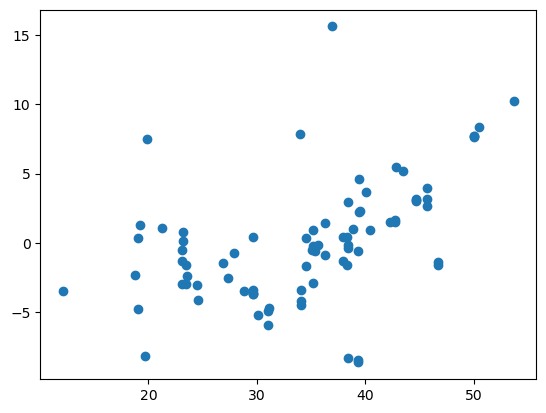

In [361]:
plt.scatter(x=cars_df["MPG"],y=error)

In [363]:
error_1=Nods["MPG"]-y_pred_nods

In [365]:
error_1

0    -0.659322
1    -0.342131
2    -0.342131
3    -0.865089
4    -0.583224
        ...   
74   -2.526441
75   -0.982863
77    0.850212
79    1.196176
80   -0.529126
Name: MPG, Length: 77, dtype: float64

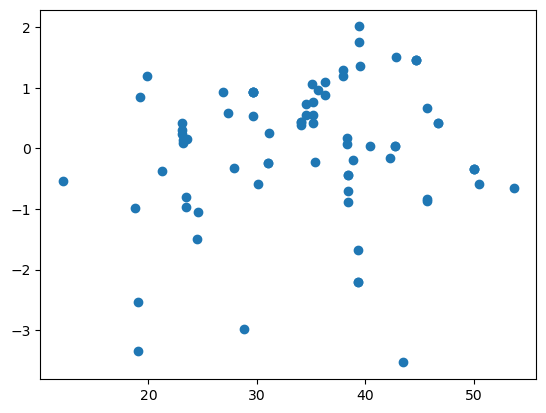

In [367]:
plt.scatter(x=Nods["MPG"],y=error_1)

In [371]:
# STILL FAILURE = HOMOSCADASTICITY

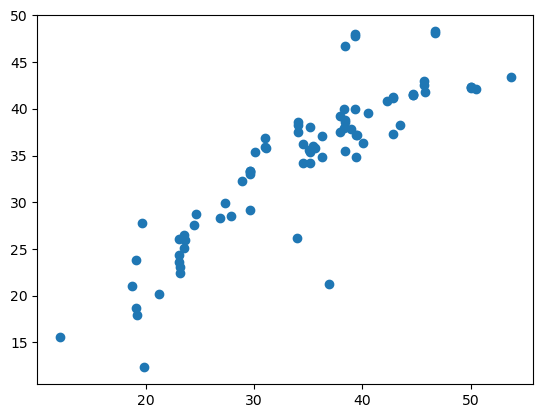

In [381]:
plt.scatter(x=y,y=y_pred) # BEFORE TRANSFORMATION

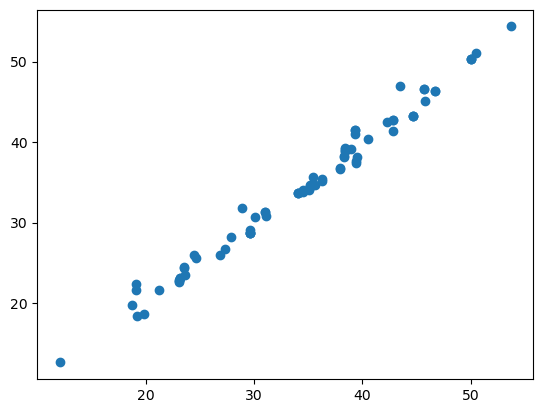

In [383]:
plt.scatter(x=Nods["MPG"],y=y_pred_nods) # AFTER TRANSFORMATION

In [379]:
# NOW, ZHM is SATISFIED